## Decision Tree Regression

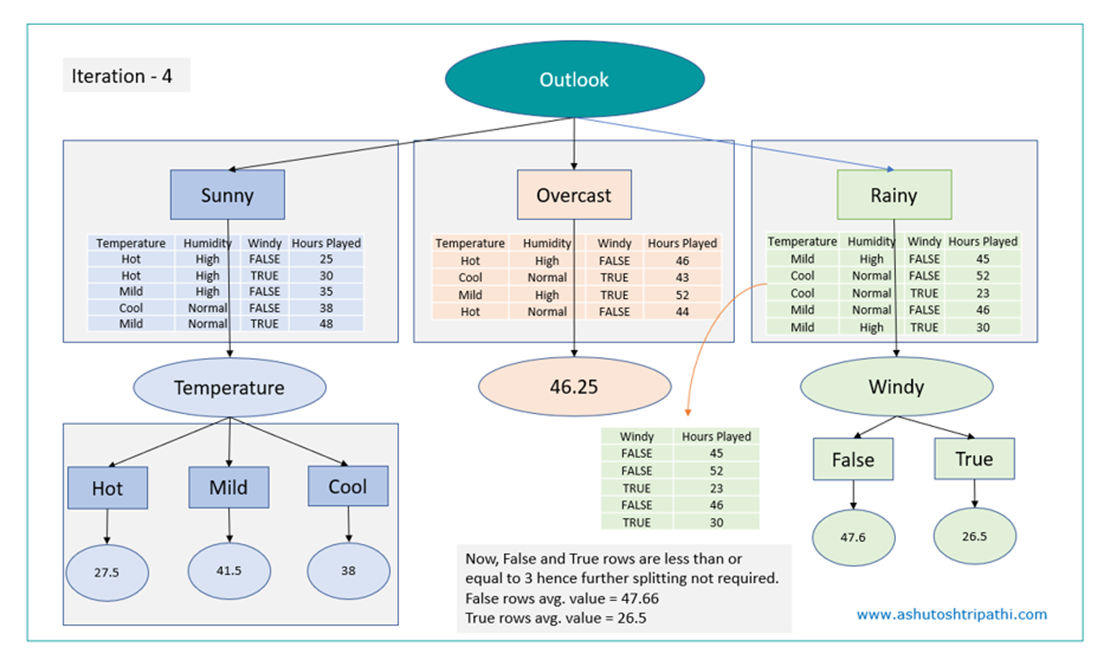

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the Dataset

In [4]:
import pandas as pd 
A = pd.read_csv('50_Startups.csv')
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Profit ~ RND ADMIN MKT STATE

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
A.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Seperating X and Y

In [7]:
X = A.drop(columns=['PROFIT'])
Y = A[['PROFIT']]

In [8]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Seperating cat con for X

In [10]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [11]:
cat

['STATE']

In [12]:
con

['RND', 'ADMIN', 'MKT']

## Preprocessing the data for X

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [15]:
cat_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [16]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [17]:
X_pre = pre.fit_transform(X)

In [18]:
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## Train test split

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=73)

In [24]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
45,-1.600350,0.101254,-1.727400,0.0,0.0,1.0
23,-0.136201,-0.562211,0.774349,0.0,1.0,0.0
13,0.402078,0.510179,0.343957,1.0,0.0,0.0
6,1.340066,0.932147,-0.688150,1.0,0.0,0.0
5,1.279800,-0.776239,1.254210,0.0,0.0,1.0


In [25]:
ytrain.head()

,PROFIT
45,64926.08
23,108733.99
13,134307.35
6,156122.51
5,156991.12


In [27]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
28,-0.168793,2.210141,-0.767189,0.0,1.0,0.0
20,0.055726,-0.269588,0.723926,1.0,0.0,0.0
49,-1.622362,-0.157226,-1.369985,1.0,0.0,0.0
34,-0.600682,1.310535,-0.001879,1.0,0.0,0.0
32,-0.226949,0.283924,-1.362450,1.0,0.0,0.0


In [28]:
ytest.head()

,PROFIT
28,103282.38
20,118474.03
49,14681.40
34,96712.80
32,97427.84


## Create the decison tree model

In [30]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1,min_samples_split=3,min_samples_leaf=3,criterion='squared_error')
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=3, min_samples_split=3)

In [31]:
model.score(xtrain,ytrain)

0.6927870932643488

In [32]:
model.score(xtest,ytest)

0.4716383055588109

## Hyperparameter tuning

In [39]:
params = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          'min_samples_split': [5, 6, 7, 8, 9, 10],
          'min_samples_leaf': [5, 6, 7, 8, 9, 10],
          'criterion': ['squared_error','absolute_error']}

In [40]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [42]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [43]:
gscv.best_score_

-215754008.97342682

In [45]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=5, min_samples_split=6)

## Evaluate model

In [46]:
best_dtr.score(xtrain,ytrain)

0.9084901940025618

In [48]:
best_dtr.score(xtest,ytest)

0.7480383360839035

## Predicting results for train and test

In [50]:
ypred_tr = best_dtr.predict(xtrain)
ypred_ts = best_dtr.predict(xtest)

In [51]:
ypred_tr[0:5]

array([ 65200.33 , 105733.54 , 141585.52 , 156556.815, 156556.815])

In [52]:
ytrain.head()

,PROFIT
45,64926.08
23,108733.99
13,134307.35
6,156122.51
5,156991.12


In [53]:
ypred_ts[0:5]

array([105733.54, 105733.54,  65200.33,  97483.56,  97483.56])

In [54]:
ytest.head()

,PROFIT
28,103282.38
20,118474.03
49,14681.40
34,96712.80
32,97427.84


## check Mean squared error, mean abosulute error and rmse, r2

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
mse = mean_squared_error(ytest,ypred_ts)
mse

714980046.925675

In [59]:
rmse = mse**(1/2)
rmse

26739.11081030323

In [61]:
r2 = r2_score(ytest,ypred_ts)
r2

0.7480383360839035

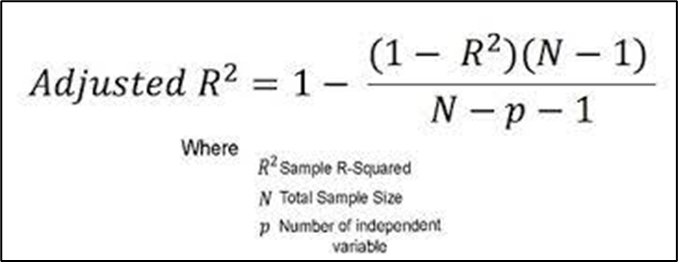

In [62]:
xtrain.shape

(40, 6)

In [63]:
xtrain.shape[0]

40

In [64]:
xtrain.shape[1]

6

In [70]:
def adj_r2(xtrain,ytrain,model):
    r2 = model.score(xtrain,ytrain)
    N = xtrain.shape[0]
    P = xtrain.shape[1]
    num = (1-r2)*(N-1)
    den = N-P-1
    r2a = 1-(num/den)
    return r2a

In [71]:
adj_r2(xtrain,ytrain,best_dtr)

0.8918520474575731

## Plot the decidion Tree

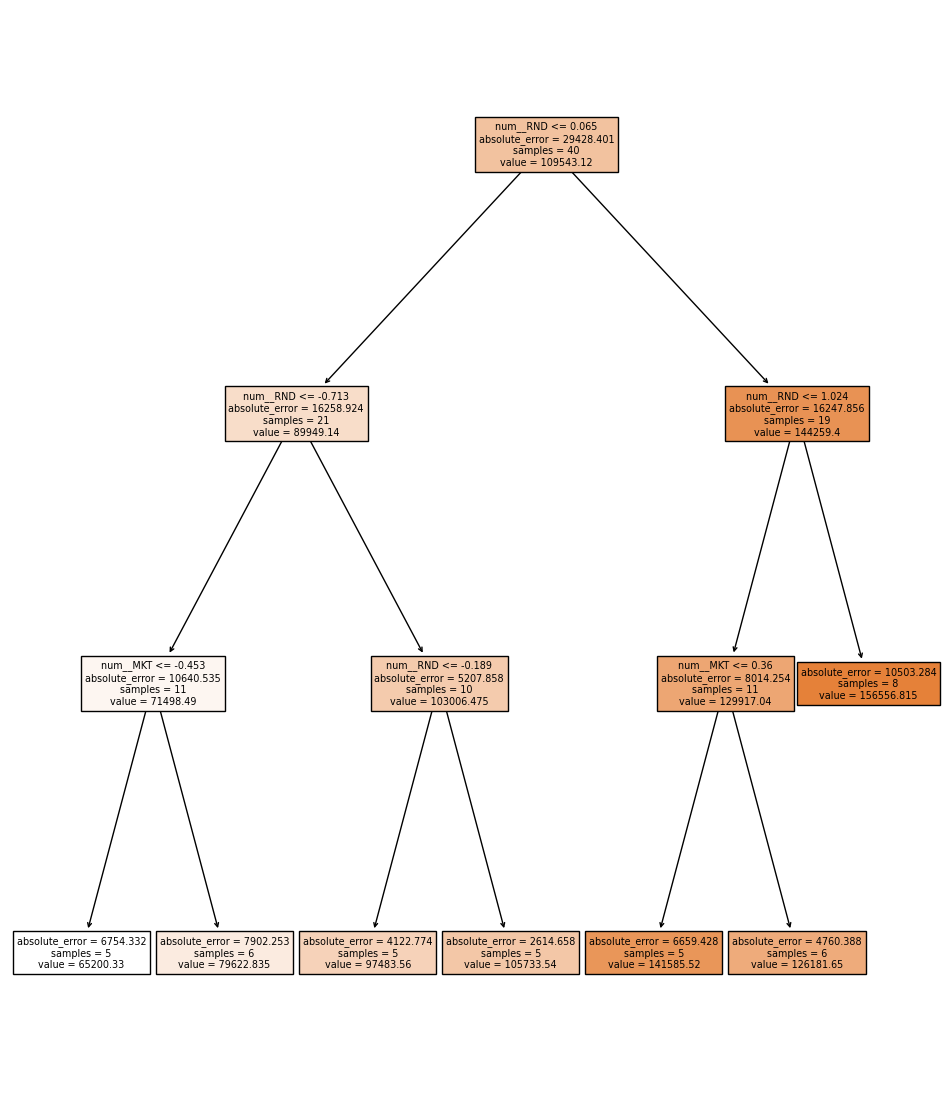

In [75]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(12,14))
plot_tree(best_dtr,filled=True,feature_names=xtrain.columns)
plt.show()